In [ ]:
from google.colab import drive # mounts the google drive for a new notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the 2 npy files created by the process_yale_images.ipynb
from numpy import load
import numpy as np
path = '/content/drive/My Drive/'
# load array
y = load(path + 'yaleExtB_target.npy')
X = load(path + 'yaleExtB_data.npy')
print('Modified Labels:' , y)

Modified Labels: [11. 12. 12. ... 12. 13. 13.]


In [ ]:
unique_labels = np.unique(y)
print('unique_labels :' , unique_labels)

unique_labels : [ 2.  3.  4.  5.  6.  7.  8.  9. 11. 12. 13. 15. 16. 17. 18. 20. 22. 23.
 24. 25. 26. 27. 28. 32. 33. 34. 35. 37. 38. 39.]


In [ ]:
label_transformations = {
    2.: 0, 3.: 1, 4.: 2, 5.: 3, 6.: 4, 7.: 5, 8.: 6, 9.: 7,
    11.: 8, 12.: 9, 13.: 10, 15.: 11, 16.: 12, 17.: 13, 18.: 14,
    20.: 15, 22.: 16, 23.: 17, 24.: 18, 25.: 19, 26.: 20, 27.: 21,
    28.: 22, 32.: 23, 33.: 24, 34.: 25, 35.: 26, 37.: 27, 38.: 28, 39.: 29
}

y = np.array([label_transformations[label] for label in y])
print("Modified Labels:", y)

Modified Labels: [ 8  9  9 ...  9 10 10]


In [ ]:
unique_labels = np.unique(y)
print('unique_labels :' , unique_labels)

unique_labels : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV # loads functions from the ML library sklearn
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [ ]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# PCA
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Grid search

In [ ]:
# Define parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(10,), (180,), (240,), (860,), (920,), (1150,)],
    'activation': ['tanh', 'relu'],
    'batch_size': [16, 128, 256, 512, 1024]
}


# Create MLPClassifier
clf = MLPClassifier(solver='sgd', verbose=True, early_stopping=True)

from sklearn.model_selection import GridSearchCV

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train a neural network with the best parameters
best_clf = MLPClassifier(**best_params).fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))




Iteration 1, loss = 3.11219809
Validation score: 0.441667
Iteration 2, loss = 1.90939047
Validation score: 0.733333
Iteration 3, loss = 1.11924485
Validation score: 0.850000
Iteration 4, loss = 0.70421337
Validation score: 0.916667
Iteration 5, loss = 0.48346491
Validation score: 0.925000
Iteration 6, loss = 0.35659658
Validation score: 0.941667
Iteration 7, loss = 0.27746267
Validation score: 0.941667
Iteration 8, loss = 0.22478494
Validation score: 0.950000
Iteration 9, loss = 0.18803566
Validation score: 0.958333
Iteration 10, loss = 0.16092241
Validation score: 0.958333
Iteration 11, loss = 0.14045009
Validation score: 0.958333
Iteration 12, loss = 0.12447838
Validation score: 0.958333
Iteration 13, loss = 0.11164383
Validation score: 0.958333
Iteration 14, loss = 0.10113558
Validation score: 0.966667
Iteration 15, loss = 0.09237507
Validation score: 0.966667
Iteration 16, loss = 0.08504069
Validation score: 0.966667
Iteration 17, loss = 0.07874211
Validation score: 0.966667
Iterat

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print( "Best parameters:", best_params)


Best parameters: {'activation': 'tanh', 'batch_size': 16, 'hidden_layer_sizes': (1150,)}


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import time

# Assuming best_params and other necessary variables are defined

# Record start time
start_time = time.time()

# Train a neural network with the best parameters
best_clf = MLPClassifier(**best_params).fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))  # <-- Corrected line

# Record end time
end_time = time.time()

# Calculate and print the running time
running_time = end_time - start_time
print(f"Running time: {running_time} seconds")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        14
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        16
           7       1.00      0.82      0.90        11
           8       1.00      0.92      0.96        12
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         9
          12       1.00      0.89      0.94         9
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         4
          16       0.89      1.00      0.94         8
          17       1.00    

In [ ]:
start_time = time.time()

Random search

In [ ]:
# Define parameter distributions for random search
param_dist = {
    'hidden_layer_sizes': [(80,), (530,), (1100,)],
    'activation': ['tanh', 'relu'],
    'batch_size': [32, 128, 256],
}


# Create MLPClassifier
clf = MLPClassifier(solver='sgd', verbose=True, early_stopping=True)

from sklearn.model_selection import RandomizedSearchCV
# Perform random search
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=2)
random_search.fit(X_train_pca, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Train a neural network with the best parameters
best_clf = MLPClassifier(**best_params).fit(X_train_pca, y_train)  # <-- Corrected line

# Make predictions on the test set
y_pred = best_clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))


Iteration 1, loss = 3.36045597
Validation score: 0.183333
Iteration 2, loss = 2.72803052
Validation score: 0.458333
Iteration 3, loss = 2.12420983
Validation score: 0.625000
Iteration 4, loss = 1.62551364
Validation score: 0.791667
Iteration 5, loss = 1.24295240
Validation score: 0.841667
Iteration 6, loss = 0.96313292
Validation score: 0.866667
Iteration 7, loss = 0.76478306
Validation score: 0.900000
Iteration 8, loss = 0.62135830
Validation score: 0.908333
Iteration 9, loss = 0.51571619
Validation score: 0.916667
Iteration 10, loss = 0.43629308
Validation score: 0.916667
Iteration 11, loss = 0.37510002
Validation score: 0.925000
Iteration 12, loss = 0.32787892
Validation score: 0.933333
Iteration 13, loss = 0.28984628
Validation score: 0.933333
Iteration 14, loss = 0.25902634
Validation score: 0.933333
Iteration 15, loss = 0.23329312
Validation score: 0.933333
Iteration 16, loss = 0.21195650
Validation score: 0.941667
Iteration 17, loss = 0.19378138
Validation score: 0.941667
Iterat

In [ ]:
# Record end time
end_time = time.time()

# Calculate and print the running time
running_time = end_time - start_time
print(f"Running time: {running_time} seconds")


Running time: 69.62494993209839 seconds


In [ ]:
# Define parameter distributions
param_dist = {
    'hidden_layer_sizes': [(100,), (200,), (360,)],
    'activation': ['tanh', 'relu'],
    'batch_size': [128, 256, 512],
}

# Create MLPClassifier
clf = MLPClassifier(solver='sgd', verbose=True, early_stopping=True)

# Perform random search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1)
random_search.fit(X_train_pca, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Train a neural network with the best parameters
best_clf = MLPClassifier(**best_params)
best_clf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))



Iteration 1, loss = 3.61239049
Validation score: 0.058333
Iteration 2, loss = 3.53934207
Validation score: 0.058333
Iteration 3, loss = 3.43882867
Validation score: 0.066667
Iteration 4, loss = 3.32900534
Validation score: 0.066667
Iteration 5, loss = 3.21629058
Validation score: 0.066667
Iteration 6, loss = 3.10467976
Validation score: 0.116667
Iteration 7, loss = 2.99343471
Validation score: 0.166667
Iteration 8, loss = 2.88445335
Validation score: 0.225000
Iteration 9, loss = 2.77658530
Validation score: 0.266667
Iteration 10, loss = 2.67227503
Validation score: 0.300000
Iteration 11, loss = 2.56940899
Validation score: 0.333333
Iteration 12, loss = 2.46961358
Validation score: 0.358333
Iteration 13, loss = 2.37250966
Validation score: 0.425000
Iteration 14, loss = 2.27781898
Validation score: 0.458333
Iteration 15, loss = 2.18579574
Validation score: 0.516667
Iteration 16, loss = 2.09698175
Validation score: 0.550000
Iteration 17, loss = 2.01149859
Validation score: 0.575000
Iterat

In [ ]:
end_time = time.time()
# Calculate and print the running time
running_time = end_time - start_time
print(f"Running time: {running_time} seconds")



Running time: 104.00513029098511 seconds


[Documentation of ML sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [ ]:
# train a neural network
nohn = 200 # nof hidden neurons
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(nohn,), solver='sgd', activation='tanh', batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.68325317
Validation score: 0.025000
Iteration 2, loss = 3.66082765
Validation score: 0.050000
Iteration 3, loss = 3.62654477
Validation score: 0.066667
Iteration 4, loss = 3.58572031
Validation score: 0.066667
Iteration 5, loss = 3.54070376
Validation score: 0.066667
Iteration 6, loss = 3.49371537
Validation score: 0.075000
Iteration 7, loss = 3.44568725
Validation score: 0.075000
Iteration 8, loss = 3.39672053
Validation score: 0.083333
Iteration 9, loss = 3.34749895
Validation score: 0.091667
Iteration 10, loss = 3.29866745
Validation score: 0.091667
Iteration 11, loss = 3.24967875
Validation score: 0.100000
Iteration 12, loss = 3.20084832
Validation score: 0.125000
Iteration 13, loss = 3.15268001
Validation score: 0.125000
Iteration 14, loss = 3.10467420
Validation score: 0.141667
Iteration 15, loss = 3.05690014
Validation score: 0.150000
Iteration 16, loss = 3.00952478
Validation score: 0.183333
Iteration 17, loss = 2

In [ ]:
y_pred = clf.predict(X_test_pca) # reoognises the test images
print(classification_report(y_test, y_pred)) # the recognition accuracy

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.92      1.00      0.96        12
           2       0.82      1.00      0.90         9
           3       1.00      0.79      0.88        14
           4       0.92      0.86      0.89        14
           5       0.88      0.78      0.82         9
           6       0.94      1.00      0.97        16
           7       1.00      0.82      0.90        11
           8       1.00      0.75      0.86        12
           9       0.89      0.89      0.89         9
          10       0.83      1.00      0.91         5
          11       1.00      0.78      0.88         9
          12       0.75      0.67      0.71         9
          13       0.83      0.83      0.83         6
          14       0.90      1.00      0.95         9
          15       0.67      1.00      0.80         4
          16       1.00      0.62      0.77         8
          17       0.86    

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

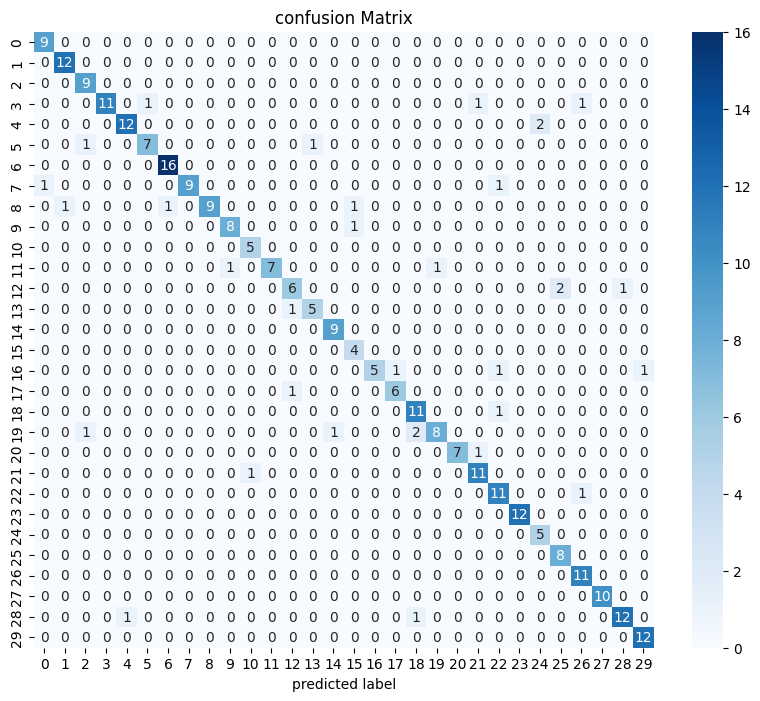

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues' , xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('confusion Matrix')
plt.xlabel('predicted label')
plt.show()